In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# def fft(image):
#     # Perform FFT on the image
#     fft_image = np.fft.fft2(image)
#     fft_shifted = np.fft.fftshift(fft_image)
#     magnitude_spectrum = 20 * np.log(np.abs(fft_shifted))

#     # Calculate the blur metric from FFT
#     blur_metric = np.mean(magnitude_spectrum)

#     return blur_metric


def fft(image):

    fft_image = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_image)
    magnitude_spectrum = np.abs(fft_shifted)
    # print(magnitude_spectrum)
  

    # Calculate the average frequency (mean magnitude)
    avg_frequency = np.mean(magnitude_spectrum)
    
    # Count how many pixels have a frequency greater than the average
    high_freq_pixels = np.sum(magnitude_spectrum > avg_frequency)
    
    # Calculate the total number of pixels
    total_pixels = image.size
    
    # Calculate the percentage of pixels with frequencies greater than the average
    blur_metric = (high_freq_pixels / total_pixels) * 100
    
    return blur_metric



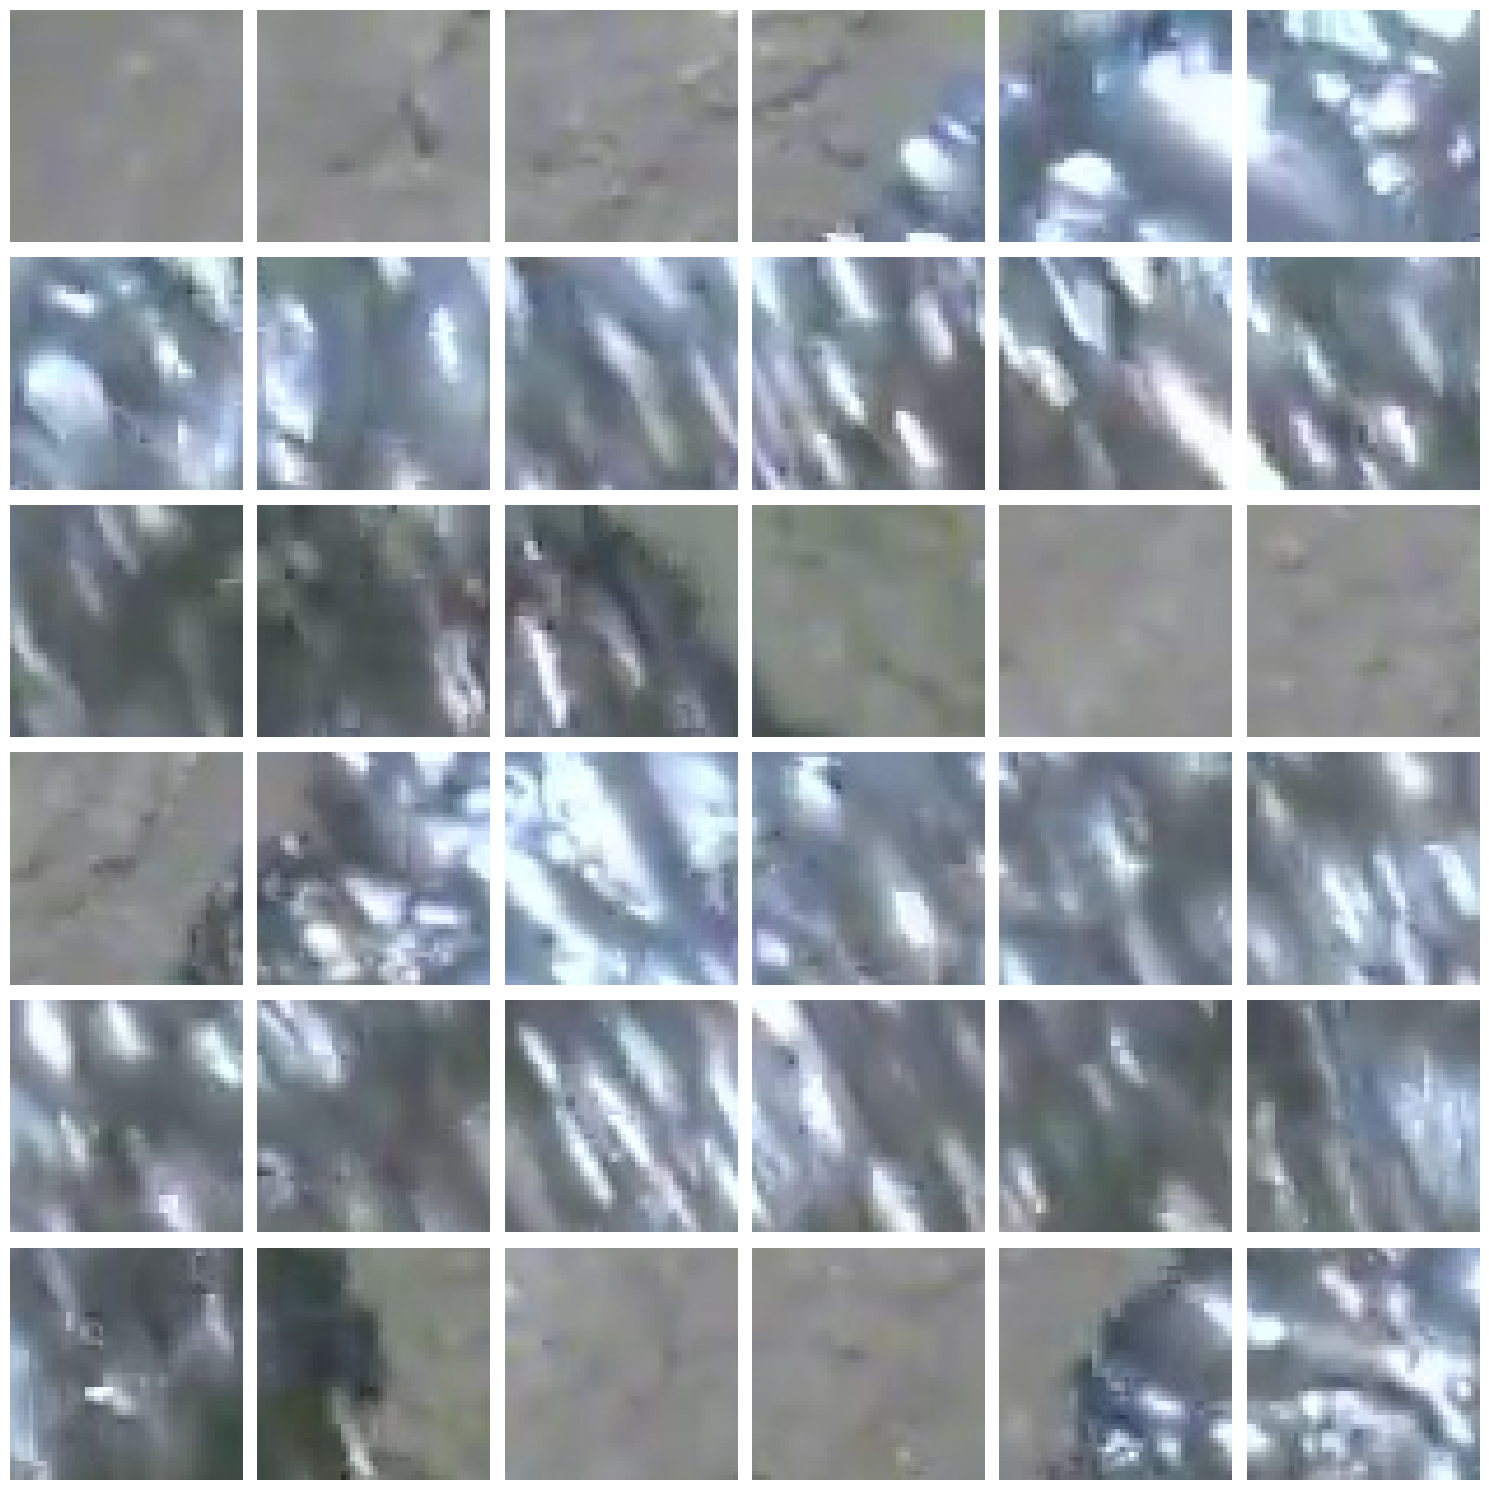

Обработано блоков: 192


In [2]:
import cv2
import matplotlib.pyplot as plt

def split_image_into_blocks(image, block_size):
    """
    Разделяет изображение на блоки заданного размера.

    Параметры:
    image (numpy.ndarray): Исходное изображение.
    block_size (tuple): Размер блока (ширину и высоту).

    Возвращаемое значение:
    list: Список блоков изображения.
    """
    # Получаем размеры изображения
    height, width = image.shape[:2]
    
    # Список для хранения блоков
    blocks = []
    
    # Проходим по всем возможным блокам
    for y in range(0, height, block_size[1]):  # Шаг по вертикали
        for x in range(0, width, block_size[0]):  # Шаг по горизонтали
            # Выделяем блок
            block = image[y:y+block_size[1], x:x+block_size[0]]
            blocks.append(block)
    
    return blocks

def get_blocks(or_image, a, b):
    """
    Загружает изображение и разделяет его на блоки заданного размера.

    Параметры:
    or_image (str): Путь к исходному изображению.
    a (int): Ширина блока.
    b (int): Высота блока.

    Возвращаемое значение:
    list: Список блоков изображения.
    """
    # Загружаем изображение
    image = cv2.imread(or_image, cv2.IMREAD_COLOR)  # Используем цветовой режим чтения

    # Определяем размер блока
    block_size = (a, b)  # Например, блоки размером 50x50 пикселей

    # Разделяем изображение на блоки
    blocks = split_image_into_blocks(image, block_size)

    # Отображаем некоторые блоки
    plt.figure(figsize=(15, 15))  # Увеличиваем размер окна для большего количества блоков
    num_blocks_to_show = min(len(blocks), 36)  # Максимально показываем 6x6 блоков
    for i, block in enumerate(blocks[:num_blocks_to_show]):
        plt.subplot(6, 6, i + 1)
        plt.imshow(cv2.cvtColor(block, cv2.COLOR_BGR2RGB))  # Преобразуем из BGR в RGB
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return blocks

# Пример использования функции
or_image = '/Users/solyanikvarvara/Desktop/misis_chill/train_dataset/cv_open_dataset/open_img/F7_2_1_1.ts_f_1000.jpg'
blocks = get_blocks(or_image, 50, 50)
print(f"Обработано блоков: {len(blocks)}")


чистый

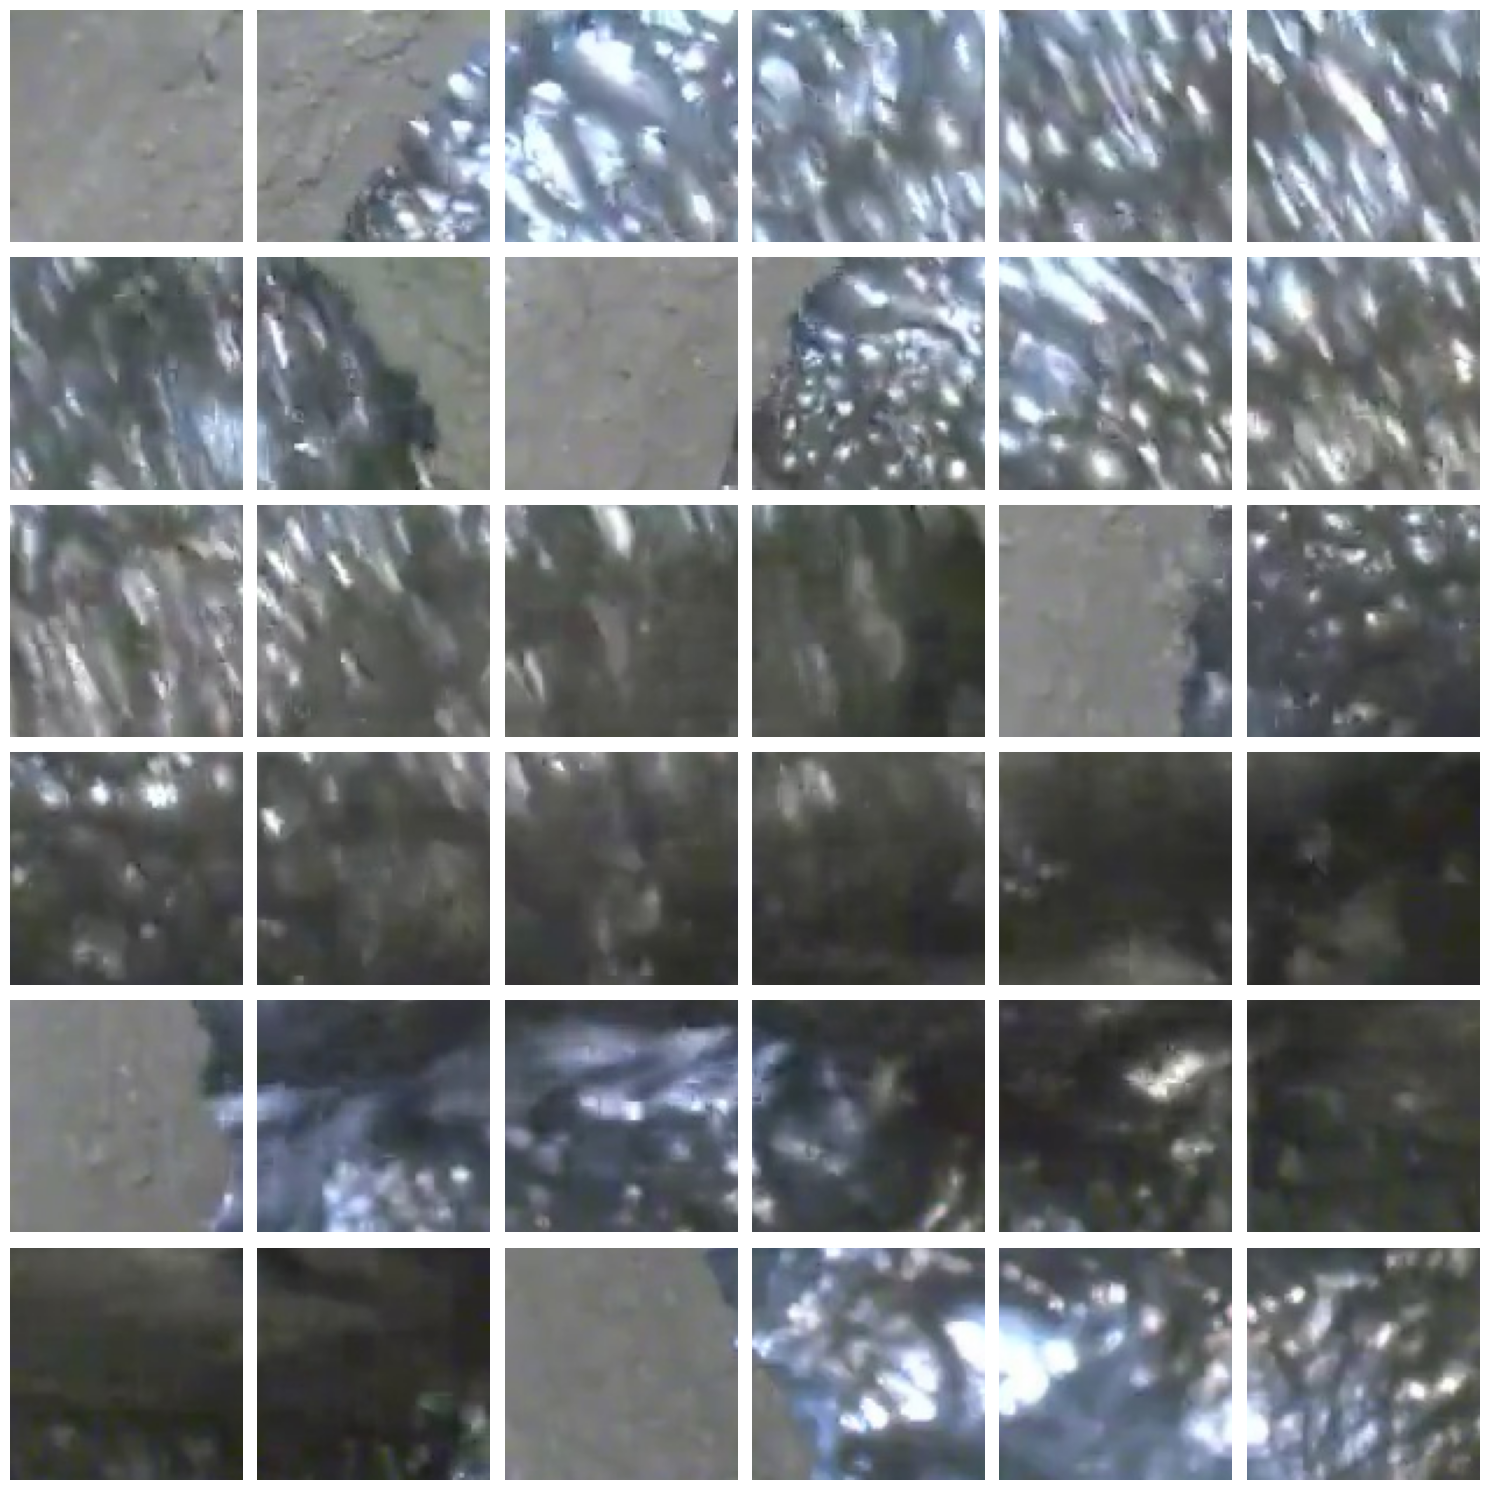

9.92


In [3]:
blocks = get_blocks('/Users/solyanikvarvara/Desktop/misis_chill/train_dataset/cv_open_dataset/open_img/F7_2_1_1.ts_f_1000.jpg', 100, 100)
for block in blocks:
    blur_metrica = []
    blur_metrica.append(fft(block))
print(np.mean(blur_metrica))

грязь

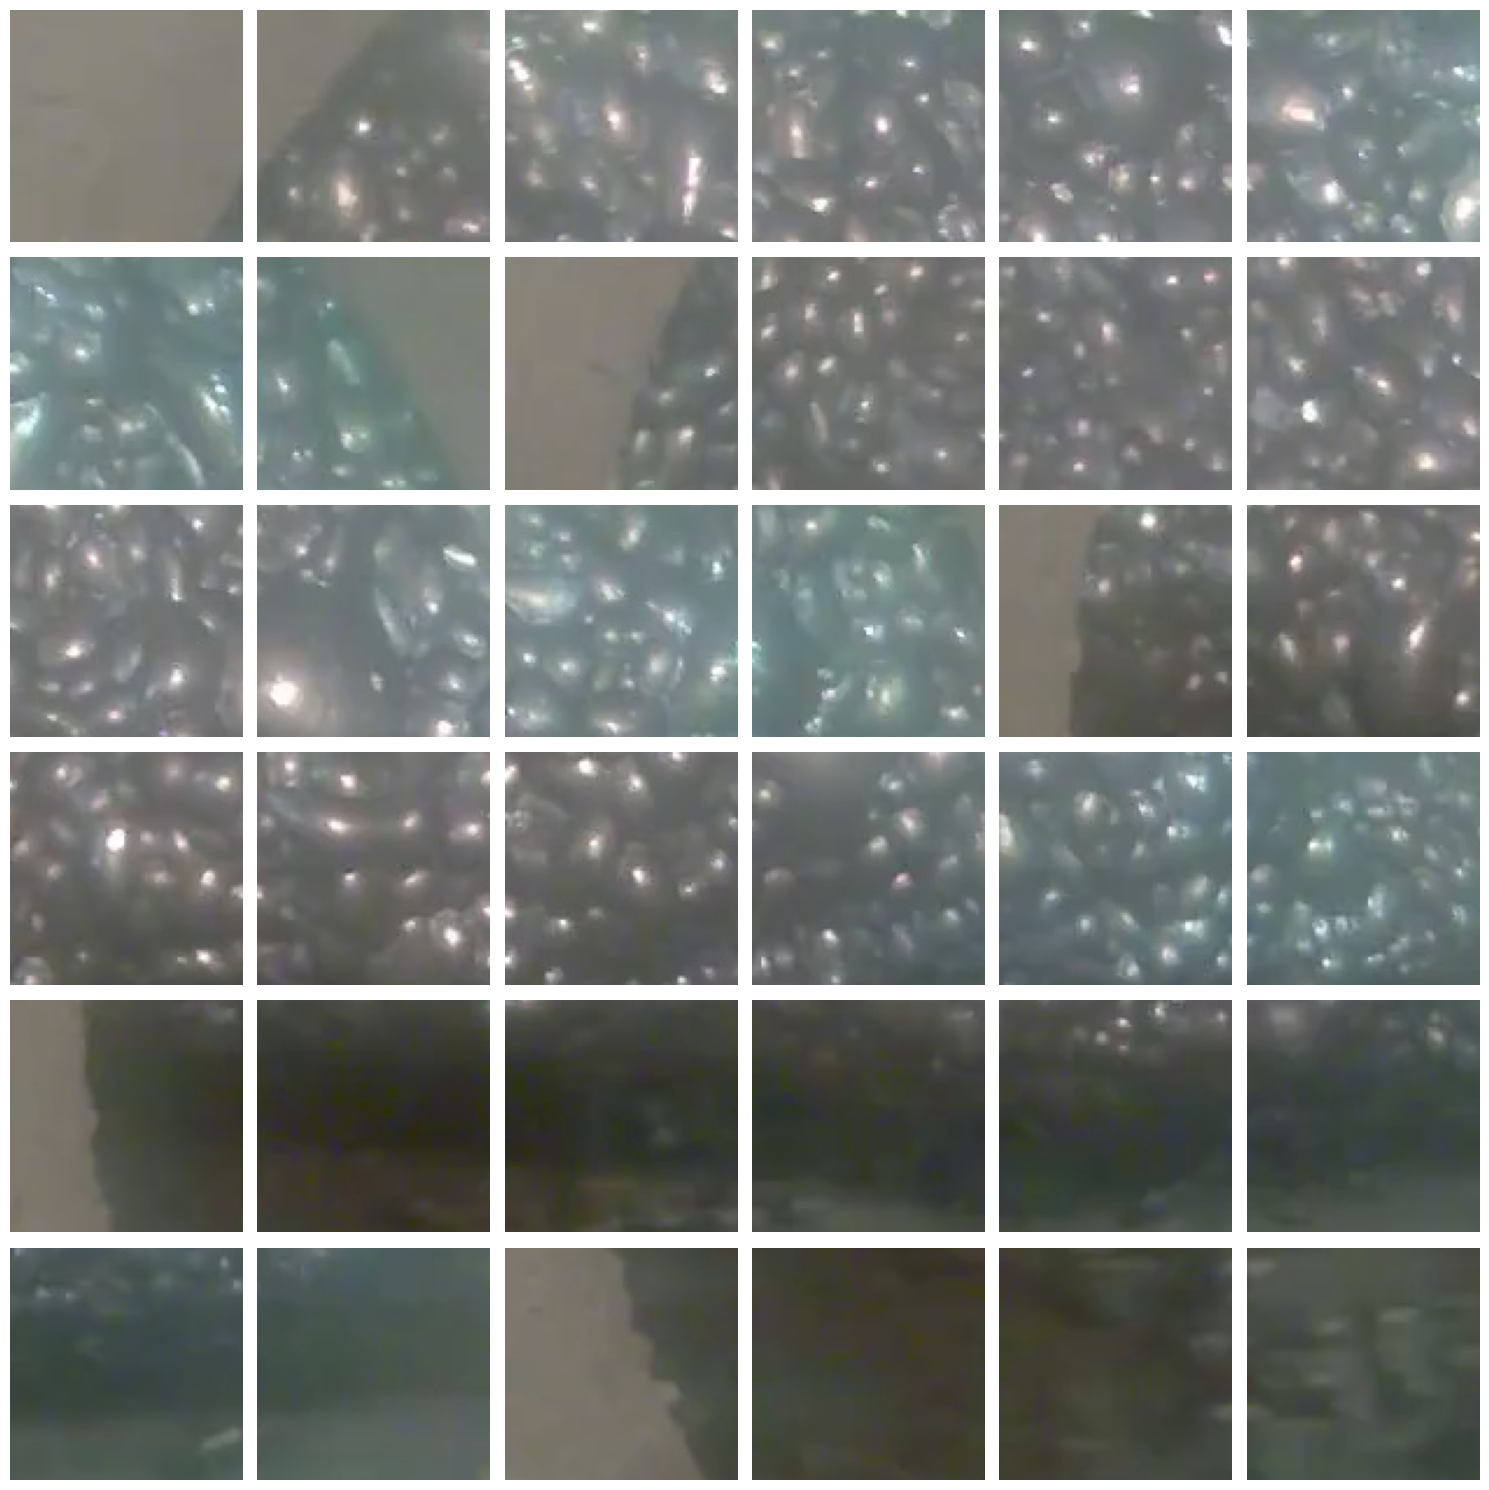

5.226666666666667


In [4]:
blocks = get_blocks('/Users/solyanikvarvara/Desktop/misis_chill/train_dataset/cv_open_dataset/open_img/F7_1_2_2.ts_f_1000.jpg', 100, 100)
# for block in blocks:
#     blur_metrica = fft(block)
#     print(blur_metrica)
#     plt.imshow(block)
# print(np.average(blur_metrica))
for block in blocks:
    blur_metrica = []
    blur_metrica.append(fft(block))
print(np.mean(blur_metrica))

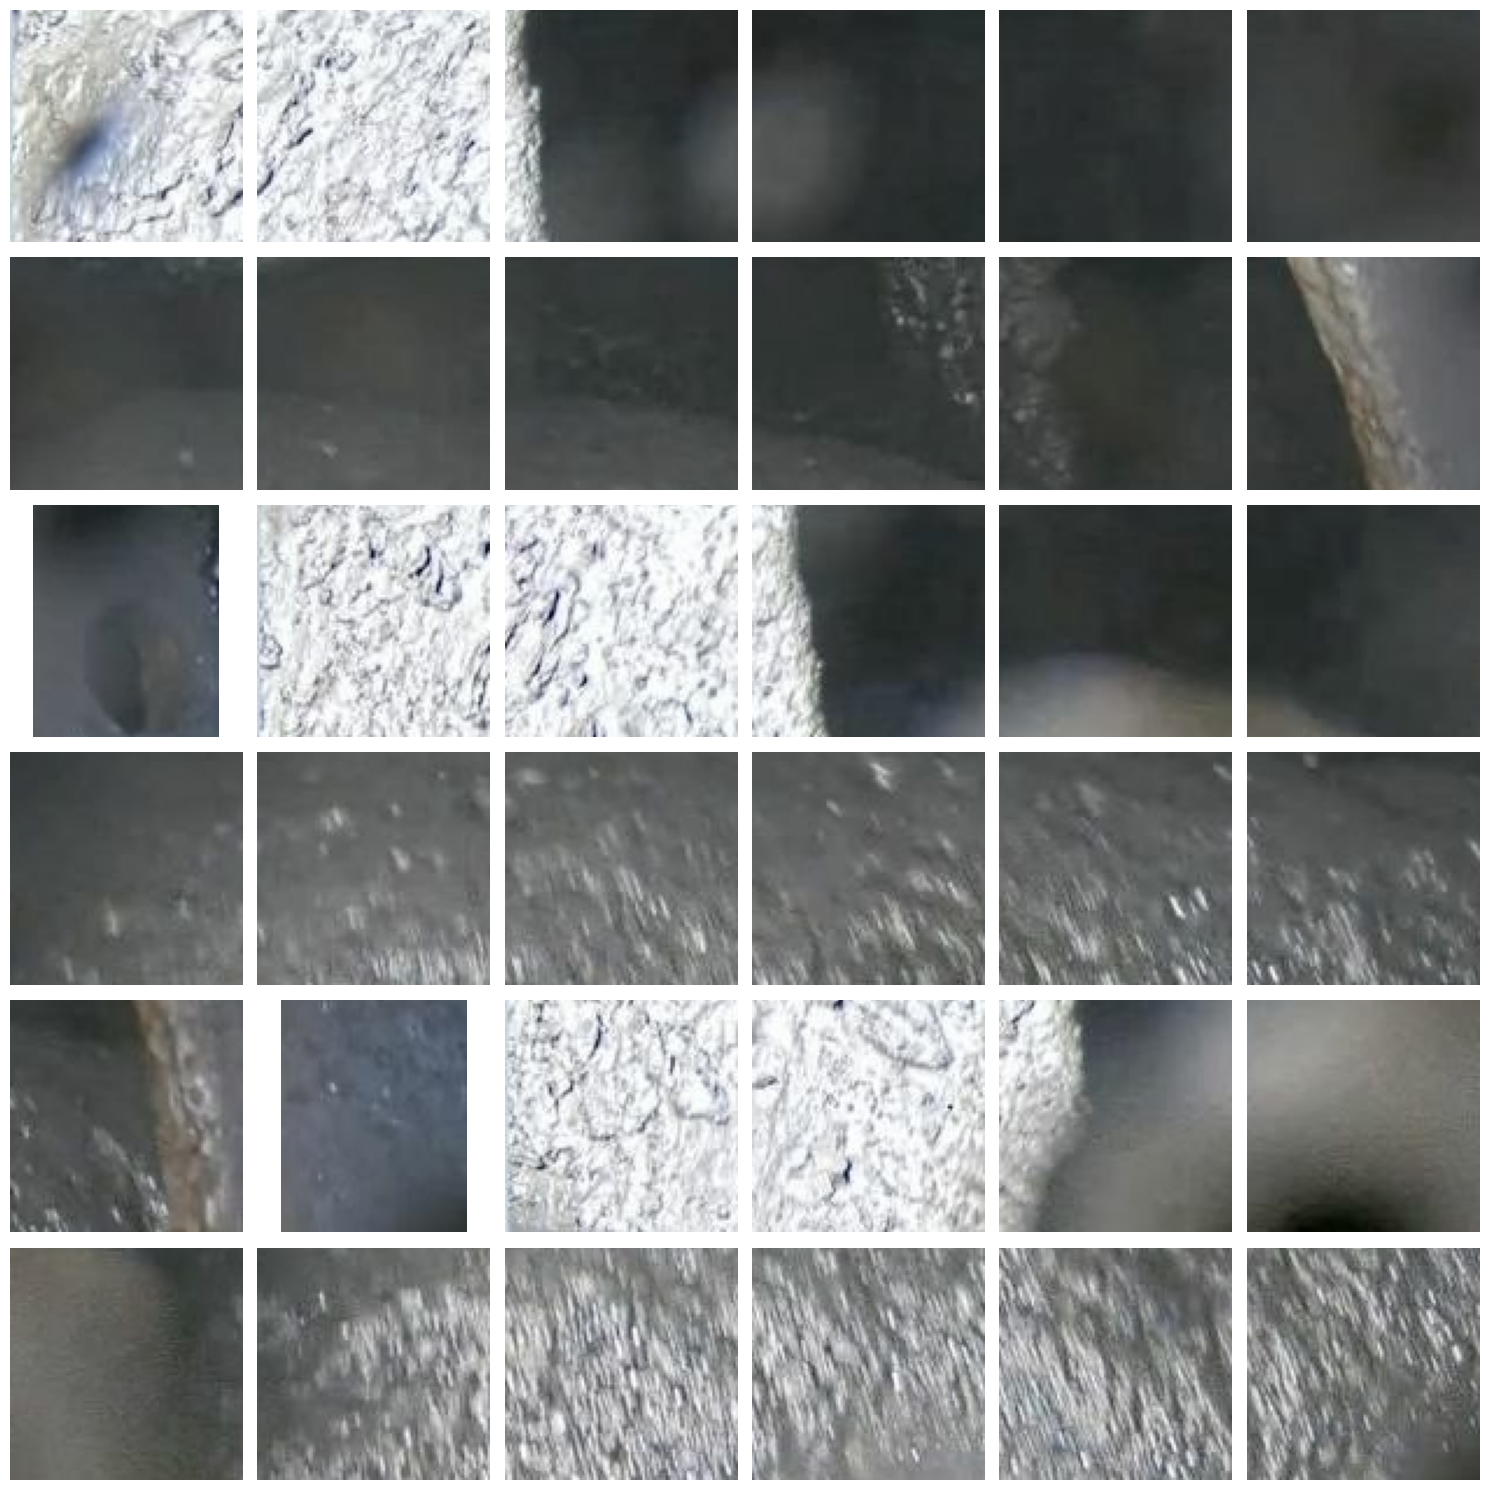

11.011904761904761


In [6]:
blocks = get_blocks('/Users/solyanikvarvara/Desktop/misis_chill/train_dataset/cv_open_dataset/open_img/gr1.jpg', 100, 100)
for block in blocks:
    blur_metrica = []
    blur_metrica.append(fft(block))
print(np.mean(blur_metrica))
